## [ Part 4 시각화 도구 ]


### 교재 복습 <hr>
#### 1. Matplotlib - 기본 그래프 도구

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_excel('../DATA/시도별 전출입 인구수.xlsx')

df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
## 1-1 선 그래프
# 누락 값(NaN)을 앞 데이터로 채우기
df = df.ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
# 서울에서 다른 지역으로 이동한 데이터만
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis='columns')
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis='columns')
df_seoul =df_seoul.set_index('전입지')
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [5]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

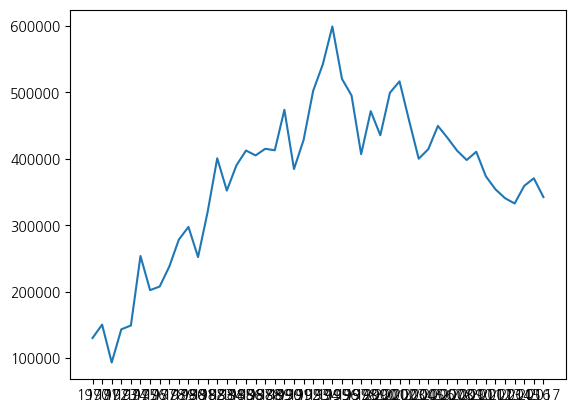

In [6]:
# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

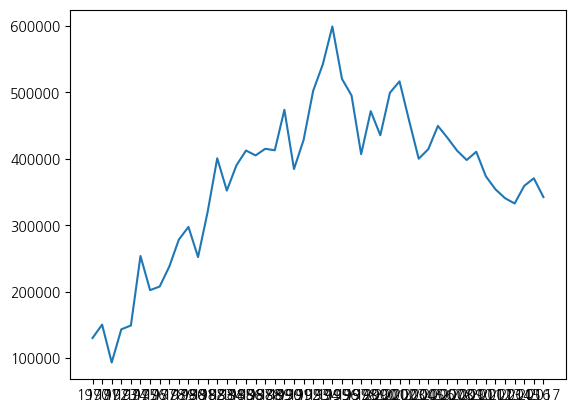

In [7]:
plt.plot(sr_one)
plt.show()      ## 객체가 표시되지 않고 그림만 표시됨

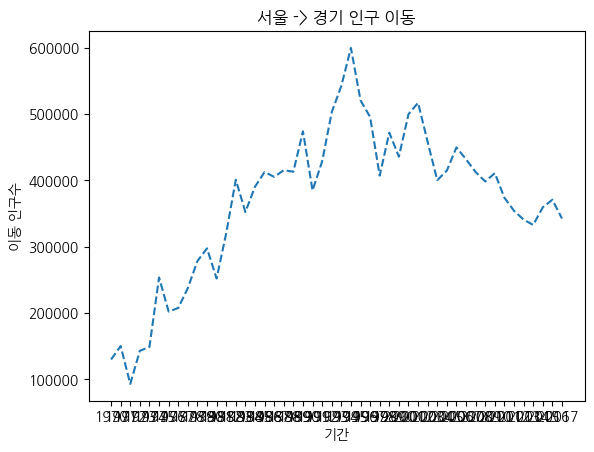

In [8]:
plt.plot(sr_one.index, sr_one.values, linestyle='--')
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()              ## 변경사항을 저장하고 그래프 출력

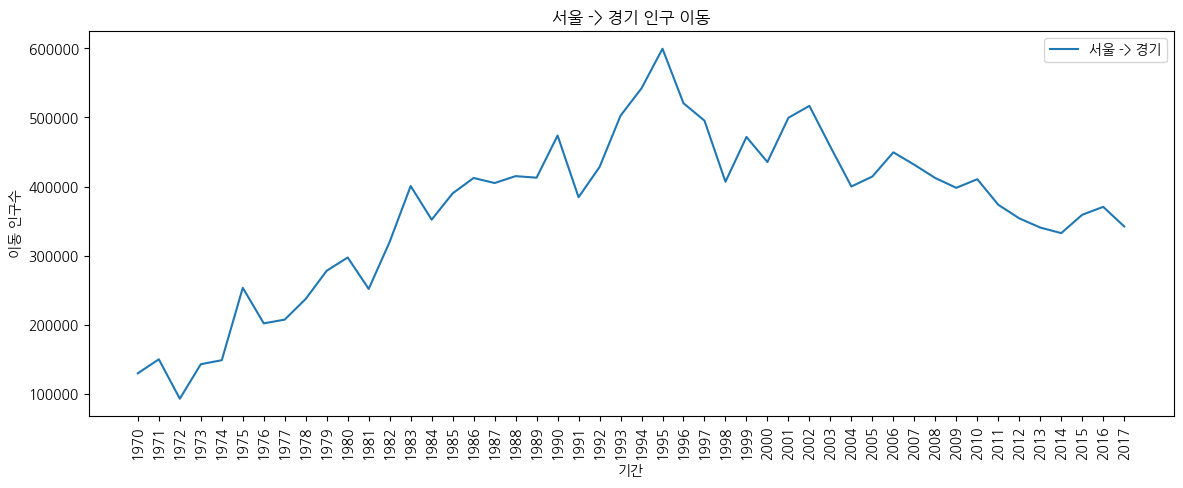

In [9]:
# 그래프 꾸미기
plt.figure(figsize=(14,5))      ## 창 사이즈
plt.xticks(rotation='vertical') ## x축 레이블 오른쪽 수직으로 회전
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'], loc='best') ## best는 최적의 장소를 자동으로 선택함 

plt.show()             

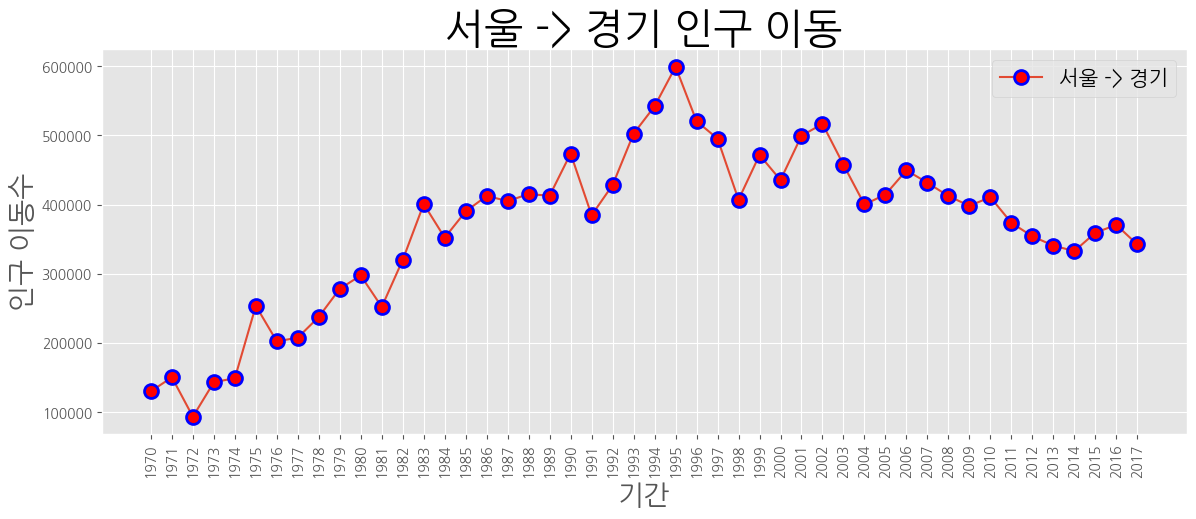

In [10]:
# 스타일 서식 지정
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation='vertical')

plt.plot(sr_one.index, sr_one.values,
         marker='o',
         markerfacecolor='red',
         markeredgecolor='blue',
         markeredgewidth=2,
         markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('인구 이동수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

plt.show()

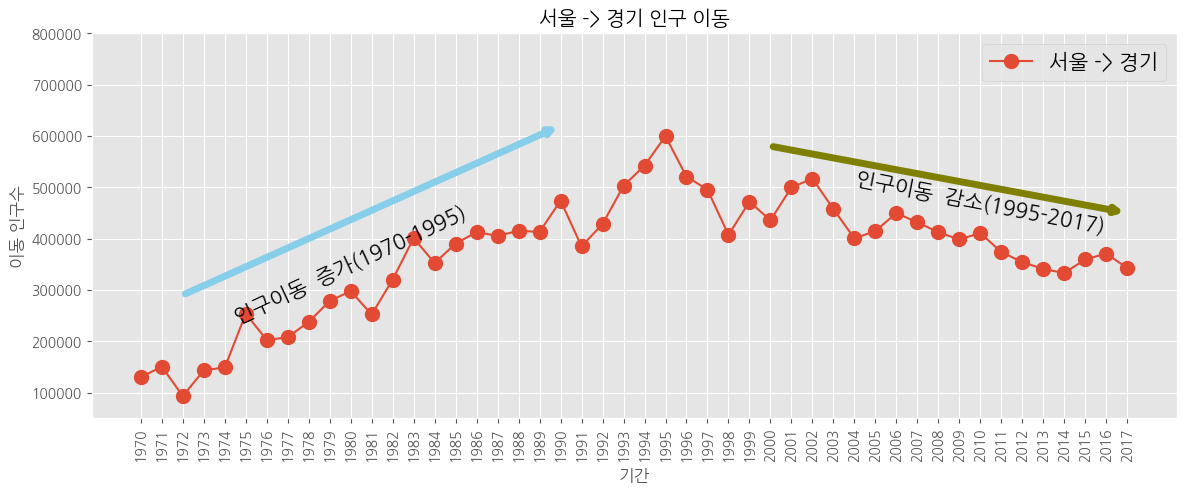

In [19]:
# ha, va, annotate 설정 
# va       : 글자를 위아래 세로 방향 정렬 
# ha       : 글자를 양옆 가로 방향 정렬 
# annotate : 그래프에 대한 설명 주석 

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 늘리기
plt.figure(figsize=(14,5))

# x축 눈금 레이블 회전하기
plt.xticks(size=10, rotation='vertical')

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize=10)

plt.title("서울 -> 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정: ylim(최솟값, 최댓값)
plt.ylim(50000,800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20,620000),                                            ## 화살표의 머리 부분(끝점)
             xytext=(2,290000),                                         ## 화살표의 꼬리 부분(시작점)
             xycoords='data',                                           ## 좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))   ## 화살표 서식
plt.annotate('',
             xy=(47,450000),                                            ## 화살표의 머리 부분(끝점)
             xytext=(30,580000),                                        ## 화살표의 꼬리 부분(시작점)
             xycoords='data',                                           ## 좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5))     ## 화살표 서식

# 주석 표시 - 텍스트
plt.annotate('인구이동  증가(1970-1995)',                                 ## 텍스트 입력
             xy=(10,350000),                                            ## 텍스트 위치 기준점
             rotation= 25,                                              ## 텍스트 회전각도
             ha = 'center',                                           ## 텍스트 상하 정렬
             va = 'center',                                             ## 텍스트 좌우 정렬
             fontsize=15)                                               ## 텍스트 크기
plt.annotate('인구이동  감소(1995-2017)',                                 ## 텍스트 입력
             xy=(40,470000),                                            ## 텍스트 위치 기준점
             rotation= -11,                                             ## 텍스트 회전각도
             ha = 'center',                                           ## 텍스트 상하 정렬
             va = 'center',                                             ## 텍스트 좌우 정렬
             fontsize=15)                                               ## 텍스트 크기

plt.show()

<hr>

In [11]:
## 182p 진행
df = pd.read_csv('../DATA/삼성전자_분기별_매출액.csv')
df = df.sort_values('quarter')
df.head()

,value,quarter
5,77203607000000,2022-Q2
4,76781680000000,2022-Q3
3,70464575000000,2022-Q4
2,63745371000000,2023-Q1
1,60005533000000,2023-Q2


In [14]:
## 비어있는 figure 객체 생성 (axes 객체 없음)
fig = plt.figure()
print(fig)

Figure(640x480)


<Figure size 640x480 with 0 Axes>

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


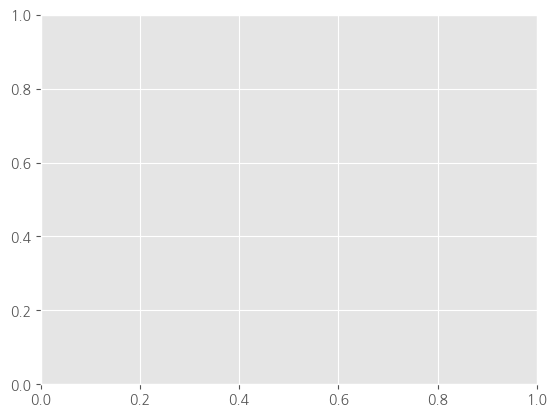

In [16]:
# 
fig, axe = plt.subplots()
print(fig)
print(axe)

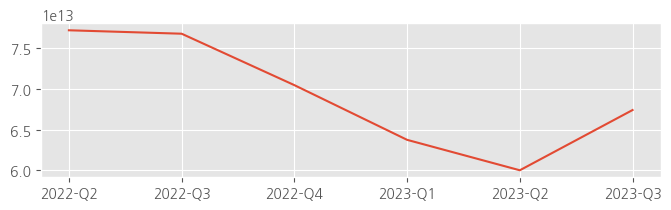

In [ ]:
# axe 객체에 차트 그리기
fig, axe = plt.subplots(figsize=(8,2))
axe.plot(df['quarter'], df['value'])

Figure(640x480)
[<Axes: > <Axes: >]


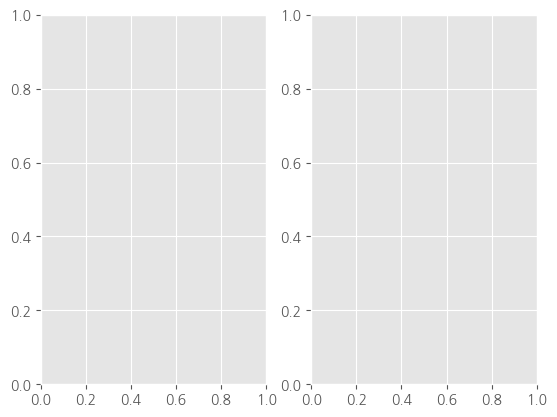

In [18]:
# figure 객체 1개 , axes 객체 2개
fig, axes = plt.subplots(1,2)
print(fig)
print(axes)

<Figure size 1200x200 with 0 Axes>

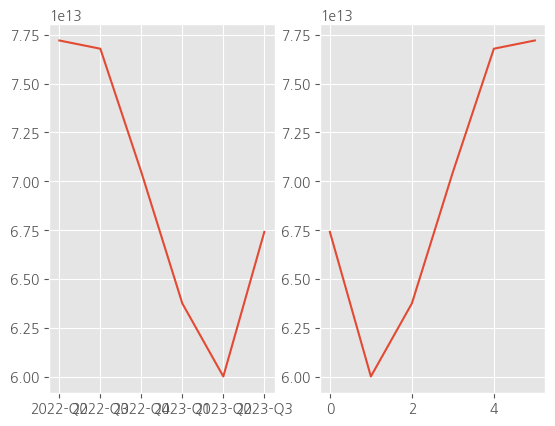

In [21]:
# axe 객체에 차트 추가
plt.figure(figsize=(12, 2))
fig, axes = plt.subplots(1,2)
axes[0].plot(df['quarter'], df['value'])
df['value'].plot(ax=axes[1])
plt.show()

Figure(640x480)
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


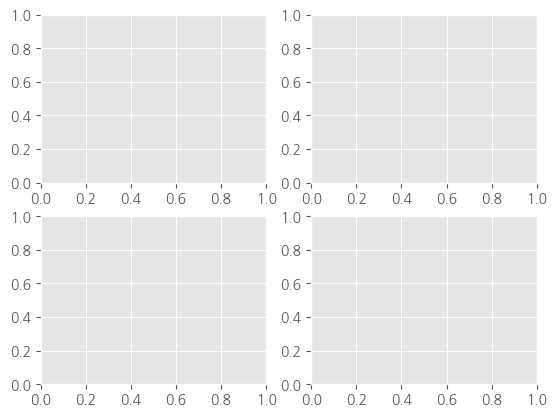

In [22]:
# figure 객체 1개, axes객체 4개(2x2 grid)
fig, axes = plt.subplots(2,2)
print(fig)
print(axes)

<Figure size 1200x200 with 0 Axes>

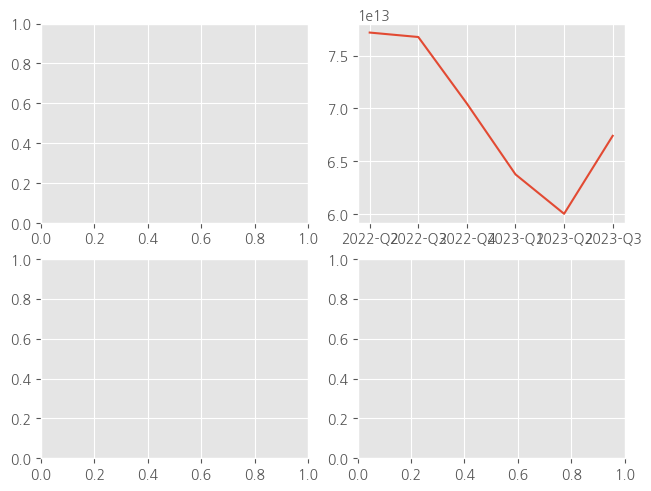

In [24]:
# axe 객체에 차트 추가
plt.figure(figsize=(12, 2))
fig, axes = plt.subplots(2,2, constrained_layout=True)
axes[0,1].plot(df['quarter'],df['value'])
plt.show()

Figure(640x480)
{'top_left': <Axes: label='top_left'>, 'right': <Axes: label='right'>, 'bottom_left': <Axes: label='bottom_left'>}


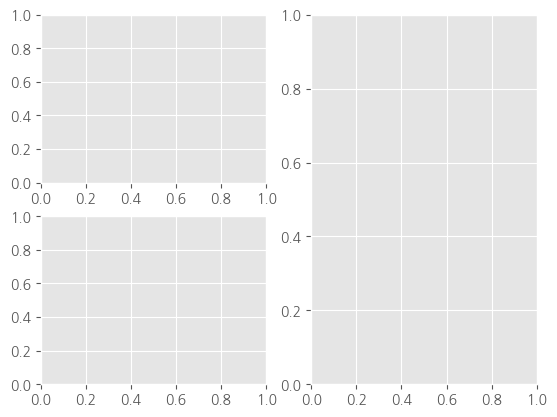

In [25]:
# figure 객체 1개, axes 객체 3개(왼쪽 2개. 오른쪽1개)
fig, axes = plt.subplot_mosaic([['top_left','right'], ['bottom_left','right']])

print(fig)
print(axes)

<Figure size 1200x400 with 0 Axes>

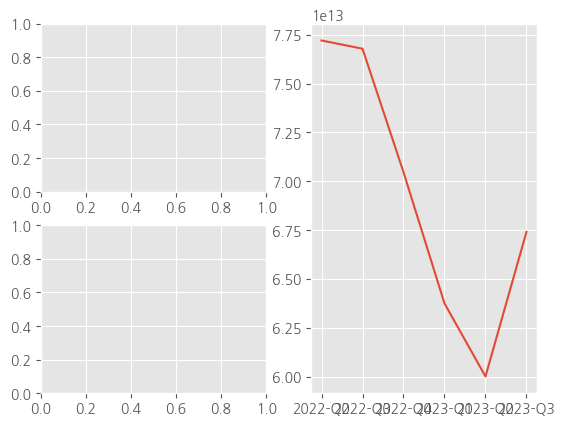

In [27]:
# axe 객체에 차트 추가
plt.figure(figsize=(12, 4))
fig, axes = plt.subplot_mosaic([['top_left', 'right'],
                                ['bottom_left','right']])
axes['right'].plot(df['quarter'], df['value'])

plt.show()

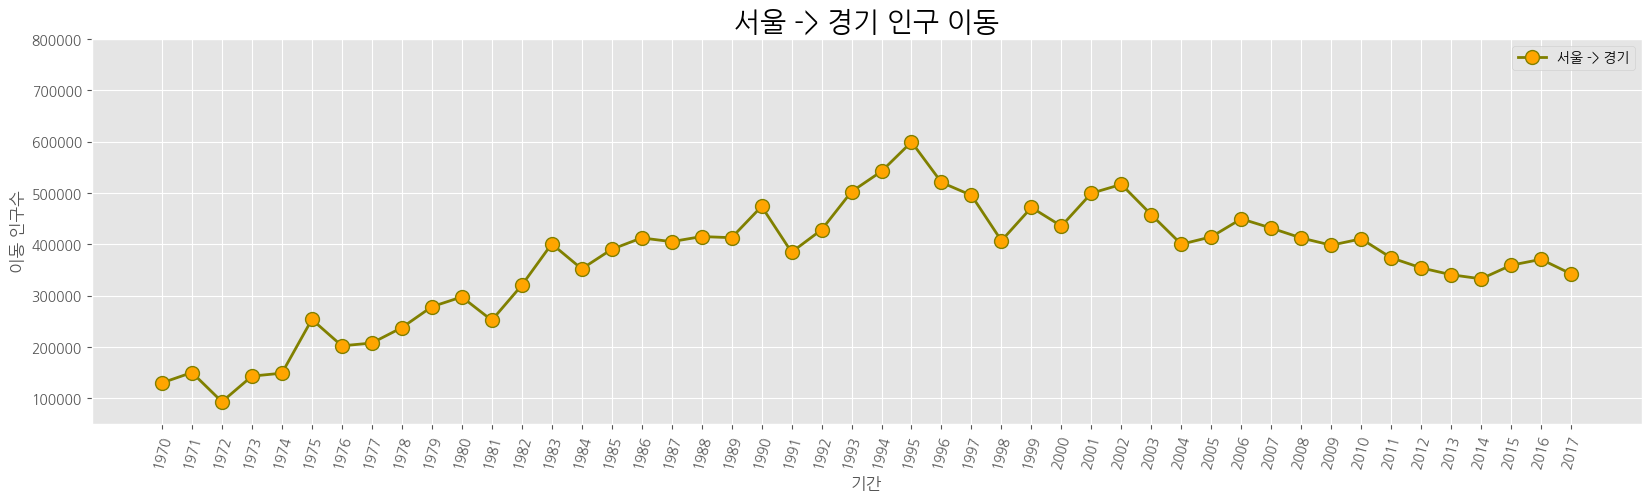

In [28]:
# axe 객체 그래프 꾸미기
## ===========================================================
## set_ylim(최솟값, 최댓값) : y축 최솟값, 최댓값
## set_title("제목")       : 제목 추가
## set_xlabel("x축이름")   : x축이름
## set_xticklabels(x의 길이와 동일한 길이만 가능, rotatation)      : x축 눈금 레이블 
## tick_params()          : 축 눈금 레이블의 크기 조절
## ===========================================================

# 스타일 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수',size=12)

# x축 눈금 위치 지정
ax.set_xticks(sr_one.index)

# x축 눈금 레이블 지정 및 75도 회전 
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 레이블 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

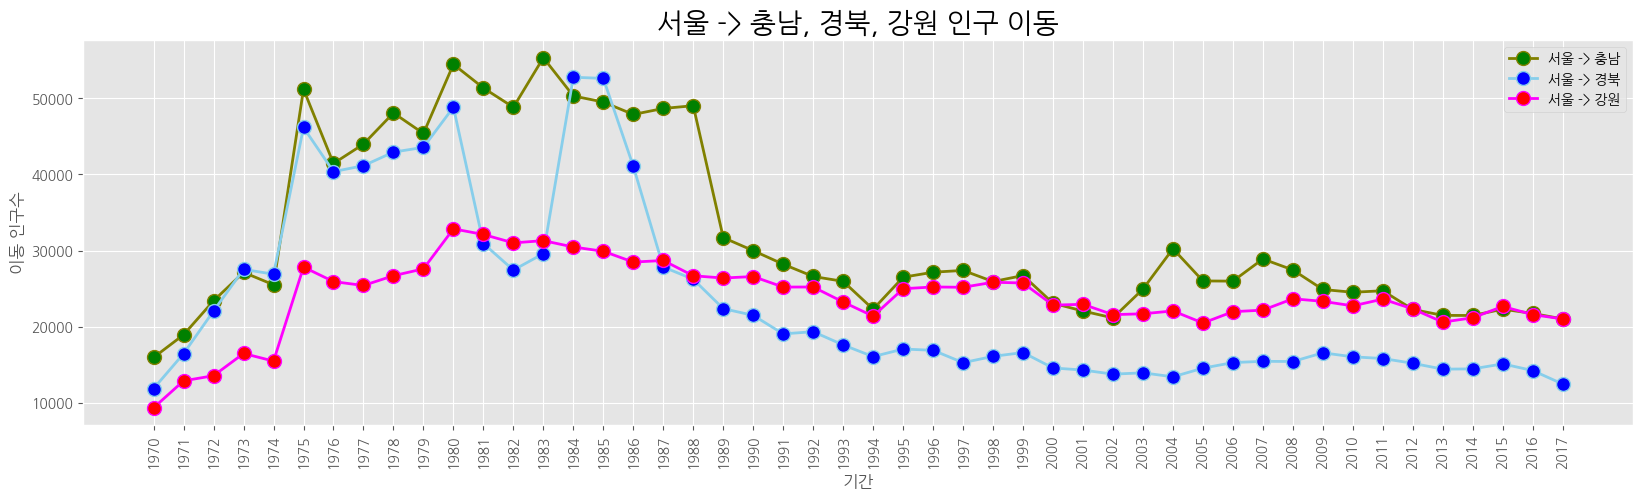

In [29]:
# 같은 화면에 그래프 추가

col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

# 스타일 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')



ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수',size=12)

# x축 눈금 위치 지정
ax.set_xticks(range(len(col_years)))

# x축 눈금 레이블 지정 및 75도 회전 
ax.set_xticklabels(sr_one.index, rotation=90)

# 축 눈금 레이블 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

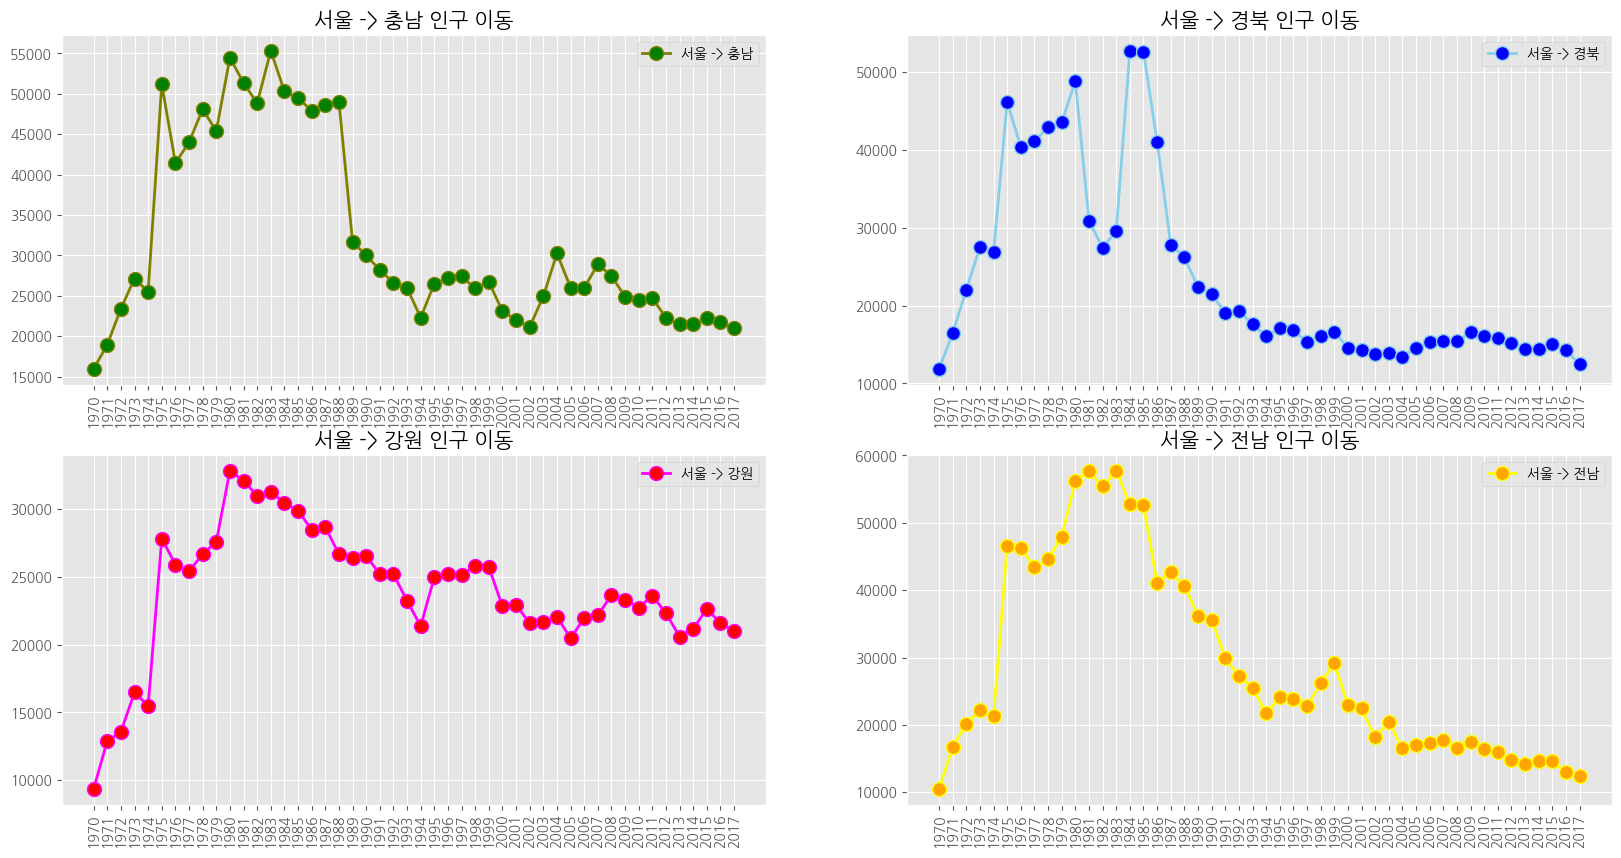

In [30]:
# 화면 4분할 그래프

# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

# 스타일 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_3.loc['전라남도',:], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')


ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# x축 눈금 위치 지정
ax1.set_xticks(range(len(col_years)))
ax2.set_xticks(range(len(col_years)))
ax3.set_xticks(range(len(col_years)))
ax4.set_xticks(range(len(col_years)))

# x축 눈금 레이블 지정 및 75도 회전 
ax1.set_xticklabels(sr_one.index, rotation=90)
ax2.set_xticklabels(sr_one.index, rotation=90)
ax3.set_xticklabels(sr_one.index, rotation=90)
ax4.set_xticklabels(sr_one.index, rotation=90)

plt.show()

In [31]:
# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

# 인구 수 데이터를 문자열(object)에서 정수형(int)으로 변환
df_4 = df_4.astype(int)
df_4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [32]:
# 연도를 행 인덱스로 하고, 각 지역별 데이터로 열 구성
df_4 = df_4.transpose()
df_4.head(7)

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251


<Figure size 2000x1000 with 0 Axes>

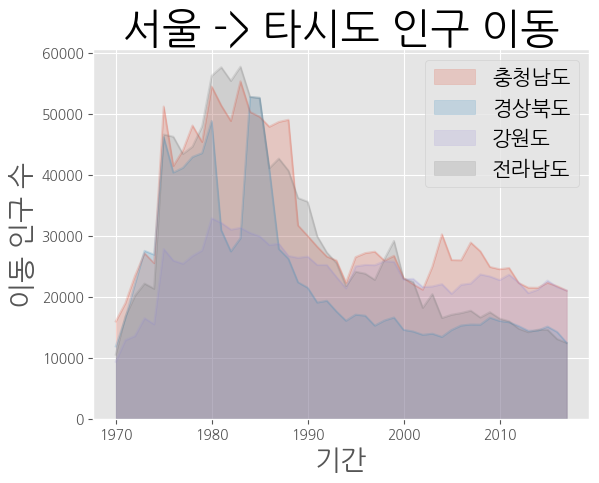

In [33]:
# 스타일 서식 지정
plt.style.use('ggplot')

plt.figure(figsize=(20, 10))

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2)

plt.title("서울 -> 타시도 인구 이동", size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<Figure size 2000x1000 with 0 Axes>

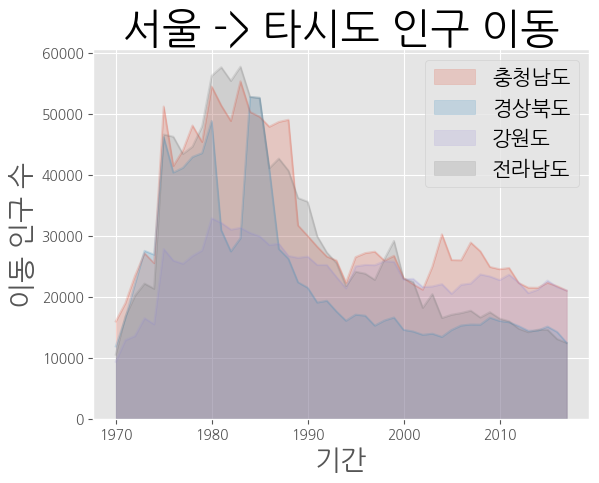

In [34]:
# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_4 = df_4.astype(int)
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
# 면저 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2)

plt.title("서울 -> 타시도 인구 이동", size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._axes.Axes'>


<Figure size 2000x1000 with 0 Axes>

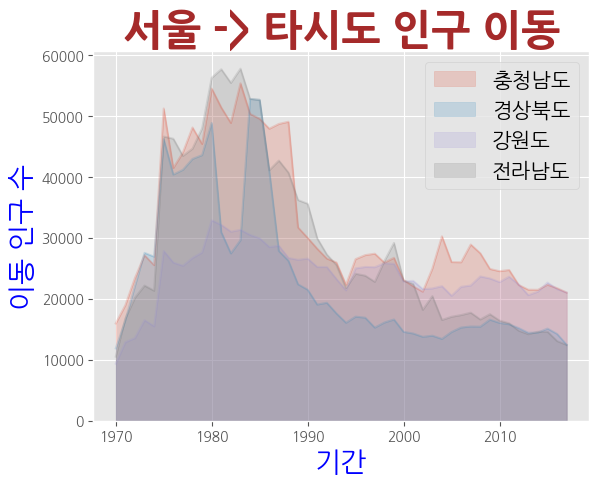

In [35]:
# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_4 = df_4.astype(int)
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

plt.figure(figsize=(20, 10))
# 면저 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2)
print(type(ax))

plt.title("서울 -> 타시도 인구 이동", size=30, color='brown',weight='bold')
plt.ylabel('이동 인구 수', size=20, color='blue')
plt.xlabel('기간', size=20, color='blue')
plt.legend(loc='best', fontsize=15)

plt.show()

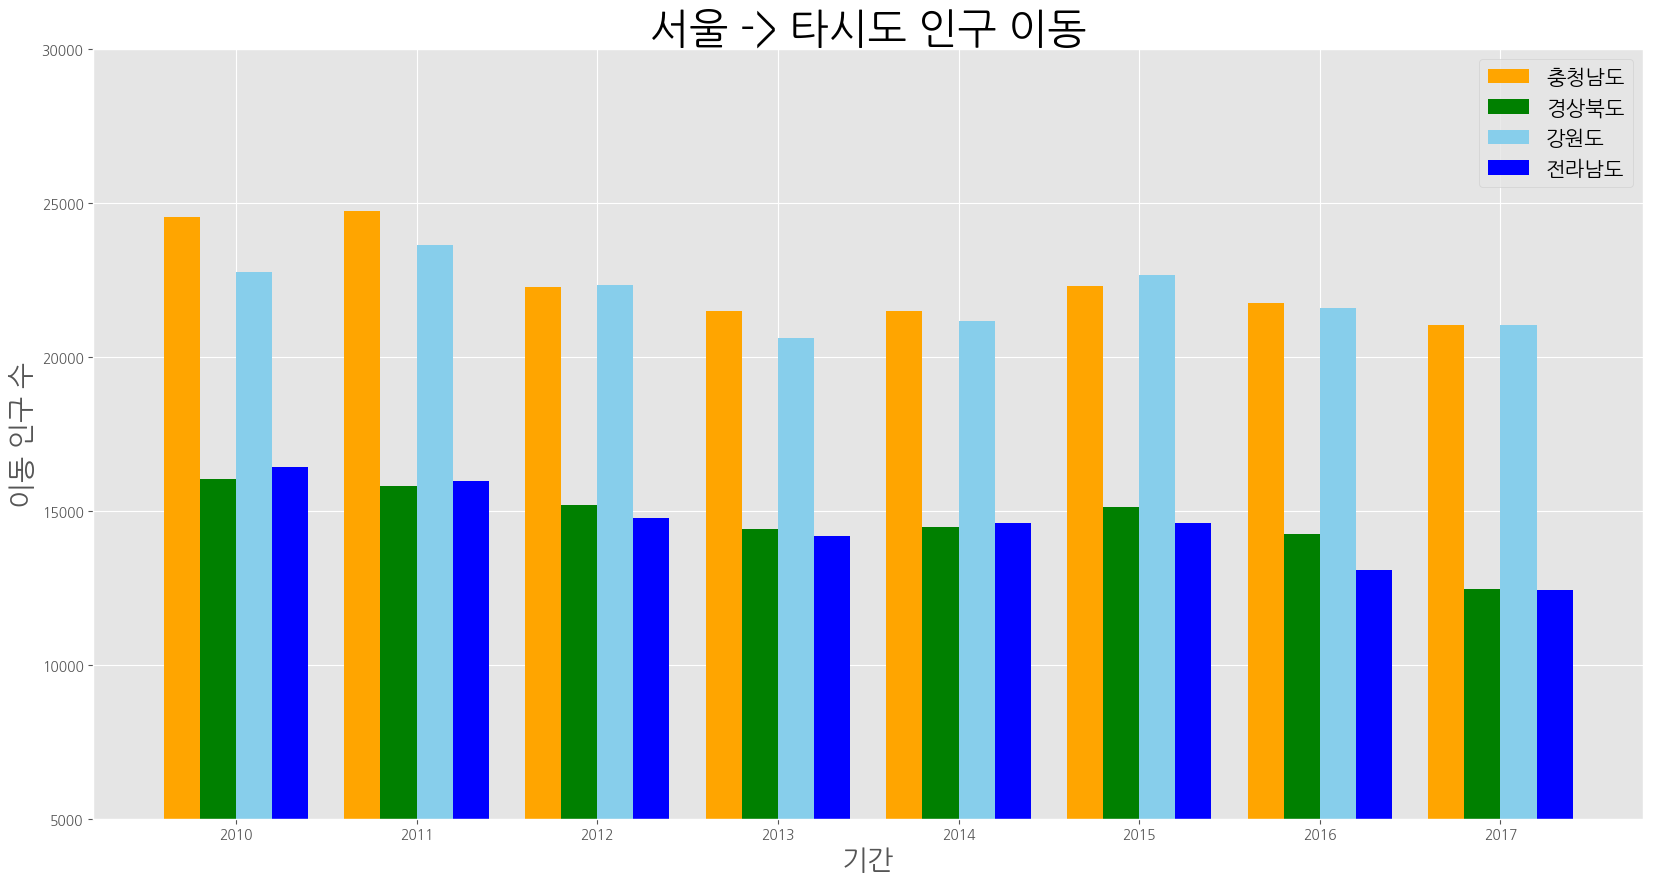

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 서울→타시도(충남/경북/강원/전남) 이동 데이터 (2010~2017만)
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years].transpose()
df_4.index = df_4.index.map(int)  # 값 정렬/일치 목적

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))

# ✅ x는 고정: 2010~2017
x = np.arange(2010, 2018)

bar_width = 0.2
offsets = [-1.5, -0.5, 0.5, 1.5]

plt.bar(x + offsets[0]*bar_width, df_4['충청남도'].values, width=bar_width, label='충청남도', color='orange')
plt.bar(x + offsets[1]*bar_width, df_4['경상북도'].values, width=bar_width, label='경상북도', color='green')
plt.bar(x + offsets[2]*bar_width, df_4['강원도'].values,   width=bar_width, label='강원도',   color='skyblue')
plt.bar(x + offsets[3]*bar_width, df_4['전라남도'].values, width=bar_width, label='전라남도', color='blue')

plt.title("서울 -> 타시도 인구 이동", size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

# ✅ 눈금도 2010~2017만
plt.xticks(x)

plt.show()



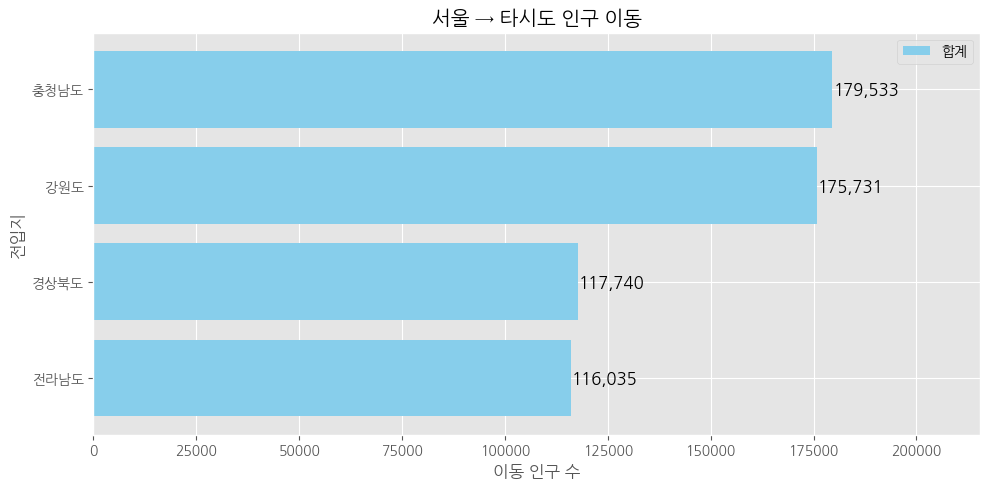

In [37]:
import matplotlib.pyplot as plt
import numpy as np


col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]


df_4['합계'] = df_4.sum(axis=1)

df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))


plt.barh(df_total.index, df_total['합계'], color='skyblue')

plt.title("서울 → 타시도 인구 이동")
plt.xlabel('이동 인구 수')
plt.ylabel('전입지')


for i, v in enumerate(df_total['합계']):
    plt.text(v + 300, i, f"{v:,.0f}", va='center', fontsize=12)
plt.legend(['합계'])
plt.xlim(0, df_total['합계'].max() * 1.2)
plt.tight_layout()
plt.show()


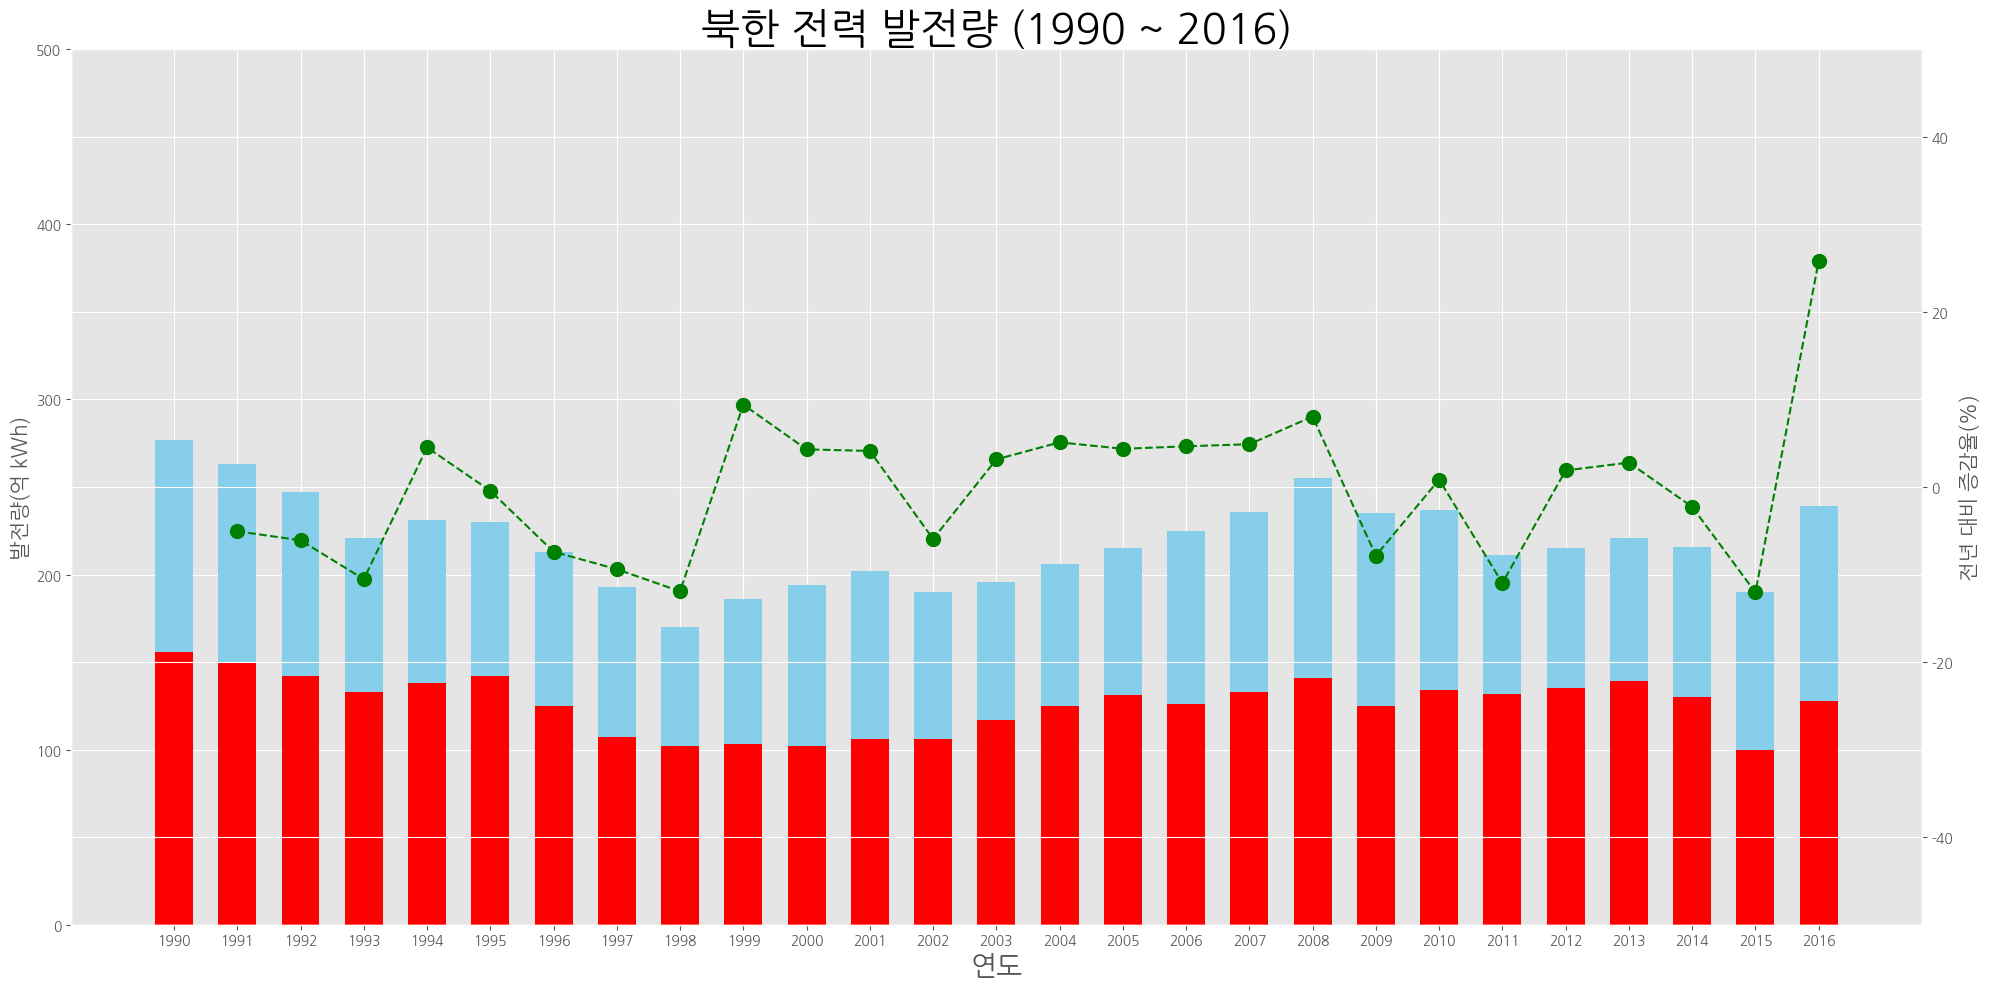

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('../DATA/남북한발전전력량.xlsx')
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T


for col in df.columns:
    df[col] = df[col].replace("-", "0")
df = df.astype(float)

# 증감율 계산
df = df.rename(columns={'합계': '총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100


# plt.bar + twin y-axis

fig, ax1 = plt.subplots(figsize=(20, 10))
x = range(len(df.index))  

# 막대 그래프
bar_width = 0.6
ax1.bar(x, df['수력'], width=bar_width, label='수력', color='red')
ax1.bar(x, df['화력'], width=bar_width, bottom=df['수력'], label='화력', color='skyblue')

# 선 그래프 (증감율, 오른쪽 축)
ax2 = ax1.twinx()
ax2.plot(x, df['증감율'], color='green', linestyle='--', marker='o', markersize=10, label='전년 대비 증감율(%)')

# 축, 제목 설정
ax1.set_xticks(x)
ax1.set_xticklabels(df.index, rotation=0)
ax1.set_xlabel('연도', fontsize=20)
ax1.set_ylabel('발전량(억 kWh)', fontsize=15)
ax2.set_ylabel('전년 대비 증감율(%)', fontsize=15)
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)
plt.title('북한 전력 발전량 (1990 ~ 2016)', fontsize=30)


plt.tight_layout()
plt.show()


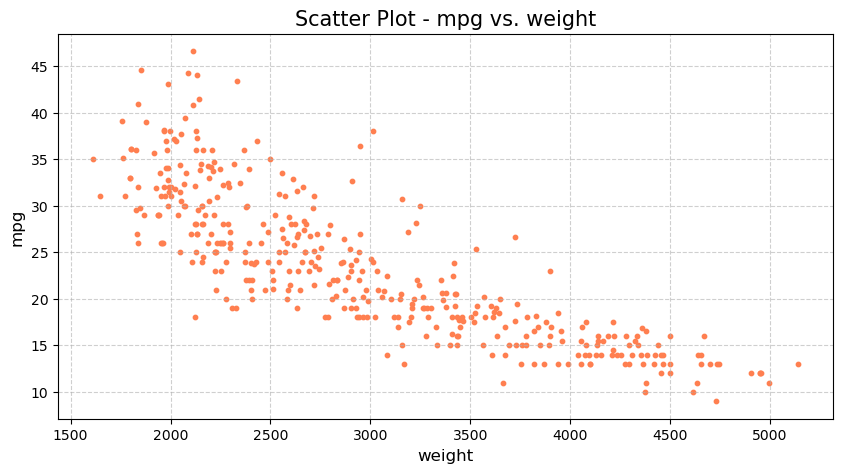

In [47]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('../DATA/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

plt.figure(figsize=(10, 5))
plt.scatter(df['weight'], df['mpg'], color='coral', s=10)   # x, y, 색상, 점 크기

plt.title('Scatter Plot - mpg vs. weight', fontsize=15)
plt.xlabel('weight', fontsize=12)
plt.ylabel('mpg', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


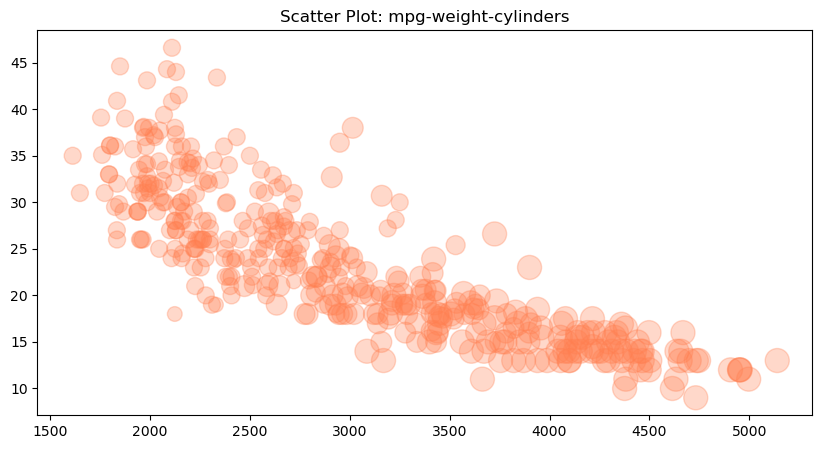

In [48]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

# read_csv() 함수로 df 생성
df = pd.read_csv('../DATA/auto-mpg.csv', header=None)


df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
plt.figure(figsize=(10,5)
           )
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = (df['cylinders'] / df['cylinders'].max()) * 300

# 3개의 변수로 산점도 그리기 
plt.scatter(df['weight'], df['mpg'], c='coral',
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

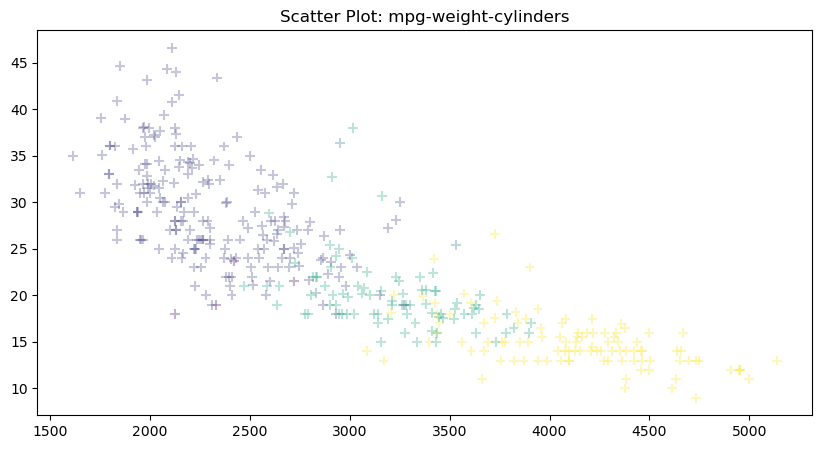

In [49]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')  

# read_csv() 함수로 df 생성
df = pd.read_csv('../DATA/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

plt.figure(figsize=(10,5))
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = (df['cylinders'] / df['cylinders'].max()) * 300

# 3개의 변수로 산점도 그리기 
plt.scatter(df['weight'], df['mpg'], marker='+',
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("scatter.png")   
plt.savefig("scatter_transparent.png", transparent=True)   

plt.show()